Prediction Accuracy (Overall): 84.48089%

Prediction Summary

Art:  79.4926%  (Sample size: 473)

Food:  48.0198%  (Sample size: 202)

Technology:  41.40625%  (Sample size: 128)

Design:  3.07692%  (Sample size: 65)

Music:  93.77593%  (Sample size: 482)

Photography:  86.19718%  (Sample size: 355)

Dance:  99.07173%  (Sample size: 1185)

Film & Video:  92.82297%  (Sample size: 418)

Publishing:  92.25092%  (Sample size: 542)

Crafts:  2.38095%  (Sample size: 84)

Games:  95.60669%  (Sample size: 956)

Journalism:  27.08333%  (Sample size: 192)

Comics:  93.21267%  (Sample size: 663)

Theater:  88.38095%  (Sample size: 525)

Fashion:  32.12435%  (Sample size: 193)


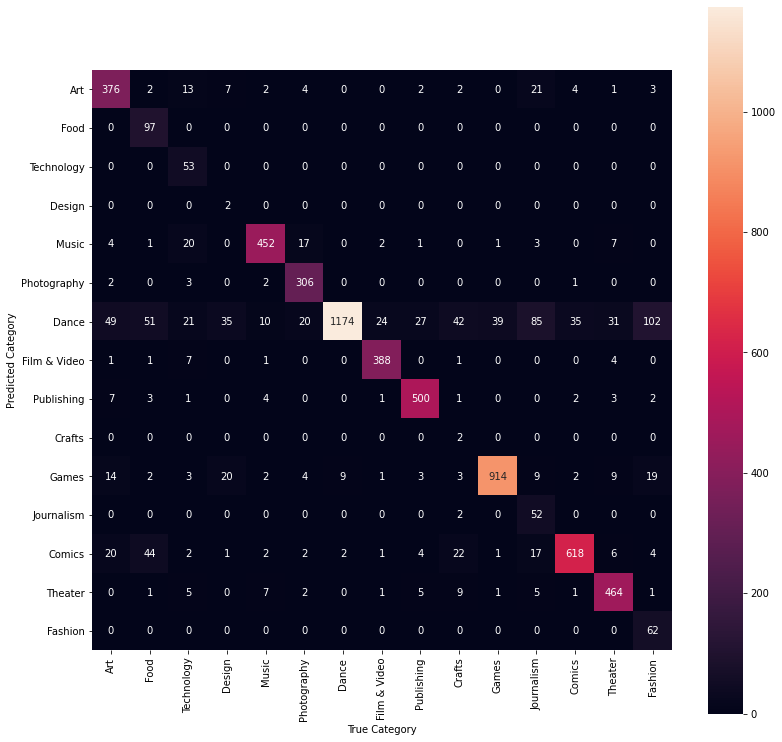

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Retrieve the csv file
url = 'https://raw.githubusercontent.com/JacobCong001/flinks-data-challenge/master/flinks-data-challenge.csv'
df = pd.read_csv(url, low_memory=False)

# View the csv file
# pd.set_option("display.max_columns", None)
# print(df)

# Organize target and input dataset
# I decide to train the model using the most relevant information, including "name" and "sub_category".
categories = list(set(df.main_category))
df["data"] = df["name"] + " " + df["sub_category"]

# Pre-process data for fitting the model
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
data = v.fit_transform(df["data"].values.astype('U'))

# Split dataset into traning and testing set
X_train, X_test, y_train, y_test = train_test_split(data, df["main_category"], test_size=0.02, random_state=30)

# Fit the Multinomial Naive Bayesian model
# I decided to use the MNB model for this classification task because it's suitable for discrete variables, such as text.
model = MultinomialNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

# Calculate the prediction accuracy
identical = sum(x == y for x, y in zip(prediction, y_test))
print("Prediction Accuracy (Overall): " + str(round(100*identical/len(prediction), 5)) + "%")


# Plot the result using heatmap
mat = confusion_matrix(y_test, prediction)
plt.figure(figsize=(13, 13))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=categories, yticklabels=categories)
plt.xlabel('True Category')
plt.ylabel('Predicted Category')

# Classification Summary
print("\nPrediction Summary")
for i in range(len(categories)):
  print("\n"+categories[i]+":  "+str(round(100*mat[i][i]/sum(mat[i]), 5))+"%"+"  "+"(Sample size: " + str(sum(mat[i]))+")")



